# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course.



Objective

Data & Assumptions

Cleaning

EDA

Modeling

Results

Limitations & Next steps

## **Objetive:**
To explore and analyze housing data from King County in order to identify the main variables that influence property prices and to build a baseline predictive model using regression techniques.

## **Import the required libraries**


In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
#!pip install -U scikit-learn

In [ ]:
import piplite
await piplite.install('seaborn')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

<ipython-input-2-b9ce4e51ce8d>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#Importing Data Sets


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [ ]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Load the csv:


In [ ]:
df = pd.read_csv(file_name)

In [ ]:
#filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
#df = pd.read_csv(filepath, header=None)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [ ]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#import pandas as pd
import pandas as pd

#load the csv file
df = pd.read_csv("housing.csv")

# Show the the data types of each column
print(df.dtypes)



Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [1]:
#describe to obtain a statistical summary of the dataframe
df.describe()

NameError: name 'df' is not defined

# Data Wrangling (Cleaning)







Initial data cleaning and inspection
Irrelevant identifier columns are removed to avoid introducing noise into the analysis. A statistical summary is then generated to understand the distribution, scale, and variability of the remaining features before proceeding with exploratory analysis and modeling.


In [2]:
#Drop the columns "id" and "Unnamed: 0"
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)
#show the statistical summary of the data
print (df.describe())


NameError: name 'df' is not defined

We can see we have missing values for the columns bedrooms and bathrooms.

In [3]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


NameError: name 'df' is not defined

We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms' using the method replace().




In [ ]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

<ipython-input-13-97ec3fe8eec1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)


In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# EDA


Floor distribution analysis
The frequency of each floor count is computed to understand how properties are distributed across different building configurations.


In [ ]:
#count the number of houses with unique floor values and convert to frame
number_houses_unique_floor = df["floors"].value_counts().to_frame()
print (number_houses_unique_floor)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8



A boxplot is used to compare price distributions and identify outliers between properties with and without a waterfront view.

Text(0.5, 1.0, 'Price Distribution by Waterfront View')

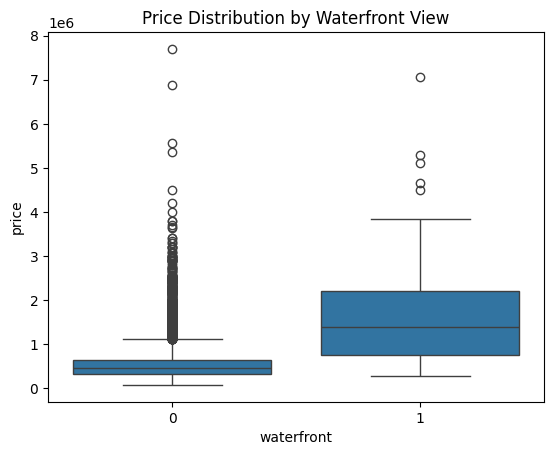

In [ ]:
#importar seaborn library and matplot
import seaborn as sns
import matplotlib.pyplot as plt

#create boxplot
plt.figure()
sns.boxplot(x="waterfront", y="price", data=df)
#put name
plt.title("Price Distribution by Waterfront View")


### Relationship between living area and price

A regression plot is used to evaluate the direction and strength of the relationship between above-ground living area (sqft_above) and housing prices.

Text(0.5, 1.0, 'Relation between sqft_above and Price')

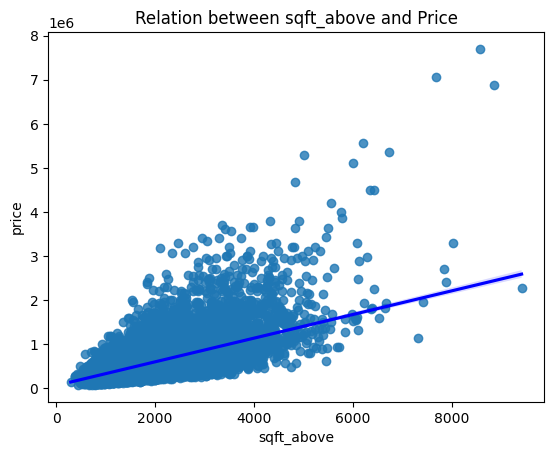

In [ ]:
#Make the regply graph sqft_above vs price
plt.figure()
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color":"blue"})
plt.title("Relation between sqft_above and Price")


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Modeling


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Baseline linear regression model

A simple linear regression model is trained using sqft_living to establish a baseline for predicting housing prices and to evaluate its explanatory power through the R² metric.


In [ ]:
#Create the linear regression
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()

lm.fit(X,Y)
print ('the R squeared in this model is' , lm.score(X, Y))

the R squeared in this model is 0.4928532179037931


Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Then calculate the R^2


In [ ]:
#Create a object for features
Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
#Fit the model using the feature "Z"
lm.fit(Z, df['price'])
print ('the R squeared in this model is' , lm.score(Z, Y))




the R squeared in this model is 0.6576890354915759


### Model pipeline setup
A preprocessing and modeling pipeline is defined to standardize feature scales, capture non-linear relationships through polynomial features, and fit a linear regression model in a consistent and reproducible workflow.


In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

#Pipeline training and evaluation
The pipeline is trained using the selected features to predict housing prices. This approach applies all preprocessing steps and the regression model in a single workflow, making the training process clearer, reproducible, and easier to evaluate using the R² metric.


In [ ]:
#import pipeline function
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#put the pipeline constructor and fit the model
pipe=Pipeline(Input)
pipe.fit(Z,Y)

#calculate the R squared
# Find the R^2 of the Pipe
Rpipe=pipe.score(Z,Y)
print('The R-square is: ', Rpipe)



The R-square is:  0.7512051345272872


# Results


Import the necessary modules:


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


#Ridge regression with regularization
A Ridge regression model is trained using the training data to reduce overfitting by penalizing large coefficients. The model is then evaluated on unseen test data using the R² metric to assess its generalization performance.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
#import ridge
from sklearn.linear_model import Ridge
#create the ridge regression object 10%
RidgeModel = Ridge(alpha=0.1)
#fit the model
RidgeModel.fit(x_train, y_train)

#calculate the Rsquared of test data
r2_test = RidgeModel.score(x_test, y_test)
print ("The Rsquared of the test is" ,r2_test)


The Rsquared of the test is 0.647875916393907


Polynomial Ridge regression
Polynomial features are applied to capture non-linear patterns, and a Ridge regression model is evaluated on test data to assess predictive performance.

In [ ]:
#Create the polynomial Transformation second order
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])
x_test_pr=pr.fit_transform(x_test[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])

#create the ridge object and fit the model for training data
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)

#calculate the Rsquared of test data
r3_test = RidgeModel.score(x_test_pr, y_test)
print ("The Rsquared of the test is" ,r3_test)




The Rsquared of the test is 0.7002744263583341


#Results
The analysis shows that property size, especially "sqft_living", has a strong positive relationship with housing prices.

The baseline linear regression model confirms that this feature alone explains a relevant portion of price variation.

Ridge regression improves model stability by handling correlated features, while the polynomial model captures some non-linear patterns and slightly improves performance on test data.

Overall, the results are reasonable for a simple modeling approach and provide a solid baseline for further improvements.

# Next Steps and Limitations
The first thing is that in the analysis is limited by the simplicity of the models and the available features, as important factors such as neighborhood characteristics and economic conditions are not included.

Also the model could be improved by incorporating additional features, applying feature selection techniques, and evaluating performance using alternative metrics such as RMSE or MAE.


